In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MultiLabelBinarizer
%matplotlib inline

In [3]:
df = pd.read_csv('ml_df.csv')

In [4]:
df.head(10)

,translated_text_no_emoji,emoji_labels
0,After a long time there was a breath of relief,[0]
1,I was able to reduce smoking!,[0]
2,Good morning friends. . . . . . Have a nice day,[]
3,Fun all night online. . .,[0]
4,Road to Sylhet Stadium… Really how beautiful...,[0]
5,A cold wind seems to be blowing. All the beddi...,"[0, 0]"
6,Open GL Error problem solving! http/fb.me/358...,"[0, 3]"
7,The sun does not know how beautiful the moon i...,[1]
8,Today is a happy day after so much injustice a...,[0]
9,ICT (Information and Communication Technology)...,"[0, 0, 0]"


In [5]:
empty_emoji_df = df[df['emoji_labels'].apply(lambda x: len(x.strip()) <= 2)]
df = df[df['emoji_labels'].apply(lambda x: len(x.strip()) > 2)]

In [6]:
df

,translated_text_no_emoji,emoji_labels
0,After a long time there was a breath of relief,[0]
1,I was able to reduce smoking!,[0]
3,Fun all night online. . .,[0]
4,Road to Sylhet Stadium… Really how beautiful...,[0]
5,A cold wind seems to be blowing. All the beddi...,"[0, 0]"
...,...,...
928,"Laughing, @sheikhriad1 Vs @dk_sadia",[0]
929,"Haha, lol hope Atit keeps up the series http/...","[0, 3]"
930,Hahaha..... What do the bulls say... 60 hours ...,[0]
932,As many incidents of vandalism happen during t...,[2]


In [7]:
empty_emoji_df

,translated_text_no_emoji,emoji_labels
2,Good morning friends. . . . . . Have a nice day,[]
27,Aha!! What a peaceful sleep!!! # Sir Wooden El...,[]
36,feeling Dil Khosh,[]
37,"just amazing Lagtes... story is not fact, acti...",[]
43,Willpower can break all obstacles!,[]
...,...,...
909,"My mind became green, fresh and relaxed like t...",[]
911,Happy Vijaya Dashmi with love and sincere cong...,[]
912,Good wishes Good Night!,[]
926,Hasina Khaleda do not live in the net! feeling...,[]


In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['translated_text_no_emoji'])
X = tokenizer.texts_to_sequences(df['translated_text_no_emoji'])

In [9]:
print("Sequences")
X[:10]

Sequences


[[47, 3, 160, 54, 38, 42, 3, 1010, 8, 1011],
 [2, 42, 451, 5, 452, 1012],
 [78, 21, 43, 336],
 [453, 5, 616, 1013, 107, 51, 108, 69, 616],
 [3,
  89,
  175,
  128,
  5,
  25,
  1014,
  21,
  1,
  1015,
  4,
  89,
  337,
  454,
  16,
  455,
  74,
  5,
  55,
  15,
  43],
 [456, 457, 1016, 197, 617, 7, 10, 6, 1017],
 [1,
  338,
  120,
  17,
  62,
  51,
  108,
  1,
  339,
  4,
  1,
  43,
  120,
  17,
  62,
  51,
  108,
  1,
  33,
  4,
  618,
  120,
  17,
  62,
  51,
  108,
  1,
  121,
  4,
  35,
  2,
  62,
  51,
  108,
  11,
  26,
  619,
  620],
 [34, 4, 3, 56, 33, 47, 27, 70, 1018, 12, 1019, 621, 1020, 458],
 [1021,
  1022,
  12,
  1023,
  622,
  1024,
  1025,
  1026,
  161,
  1027,
  623,
  46,
  176,
  624,
  1,
  129,
  238],
 [1028,
  48,
  459,
  49,
  34,
  4,
  64,
  176,
  9,
  1,
  109,
  8,
  1029,
  1030,
  625,
  7,
  625,
  1031,
  75,
  460,
  1032,
  626,
  627,
  461]]

In [10]:
vocab_size = len(tokenizer.index_word)
print("Vocabulary size :",len(tokenizer.index_word))

Vocabulary size : 2809


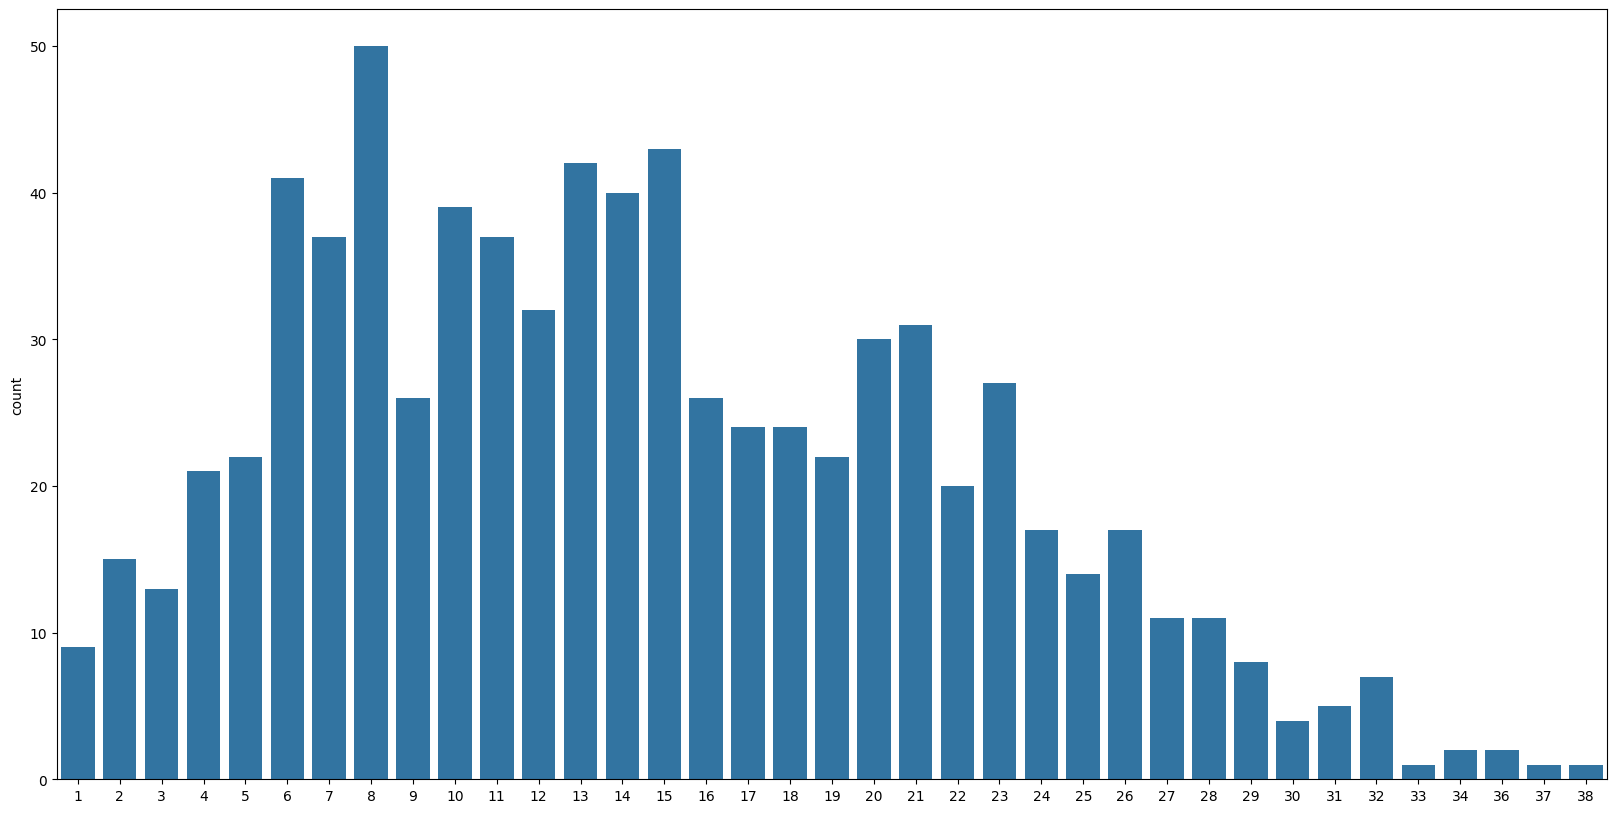

In [11]:
plt.figure(figsize=(20,10))
lens = [len(seq) for seq in X]
sns.countplot(x=lens)
plt.show()

In [12]:
X = pad_sequences(X, maxlen=50) 
X[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   47,    3,  160,   54,
         38,   42,    3, 1010,    8, 1011])

In [13]:
df['emoji_labels'] = df['emoji_labels'].apply(lambda x: list(map(int, x.strip('[]').split(','))))
df

,translated_text_no_emoji,emoji_labels
0,After a long time there was a breath of relief,[0]
1,I was able to reduce smoking!,[0]
3,Fun all night online. . .,[0]
4,Road to Sylhet Stadium… Really how beautiful...,[0]
5,A cold wind seems to be blowing. All the beddi...,"[0, 0]"
...,...,...
928,"Laughing, @sheikhriad1 Vs @dk_sadia",[0]
929,"Haha, lol hope Atit keeps up the series http/...","[0, 3]"
930,Hahaha..... What do the bulls say... 60 hours ...,[0]
932,As many incidents of vandalism happen during t...,[2]


In [14]:
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['emoji_labels'])
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [16]:
num_classes = y.shape[1]
num_classes

10

In [17]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=50))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=50))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.build(input_shape=(None, 50))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 50, 50)              │         140,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 50, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 181,360 (708.44 KB)

 Trainable params: 181,360 (708.44 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
early_stop = EarlyStopping(monitor="val_accuracy", mode="max", patience=1,verbose=1)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [19]:
model.fit(X, y, epochs=100, batch_size=64)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.3812 - loss: 2.6827
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.4855 - loss: 1.8411
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.3789 - loss: 1.7067
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.3700 - loss: 1.8624
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.4159 - loss: 1.8017
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3597 - loss: 1.8719
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.3859 - loss: 1.8392
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.3772 - loss: 1.8353
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.4182 - loss: 1.7364
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 46ms/step - accuracy: 0.3989 - loss: 1.7086
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.4138 - loss: 1.6428
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step

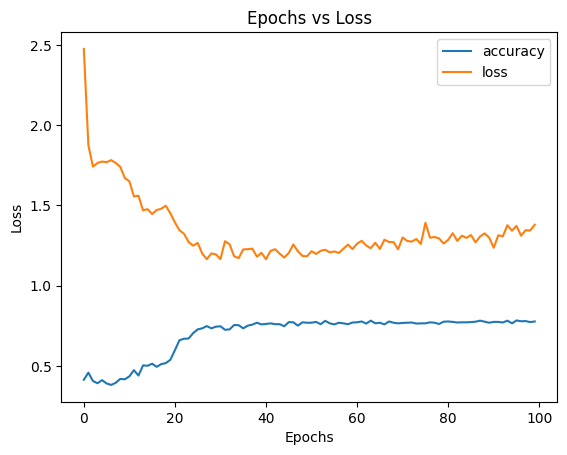

In [20]:
losses=pd.DataFrame(model.history.history)
for column in losses.columns:
    plt.plot(losses[column], label=column)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.legend()  # Show legend with labels
plt.show()

In [23]:
y_pred = model.predict(X)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y, axis=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [24]:
cm=confusion_matrix(y_test_labels, y_pred_labels)

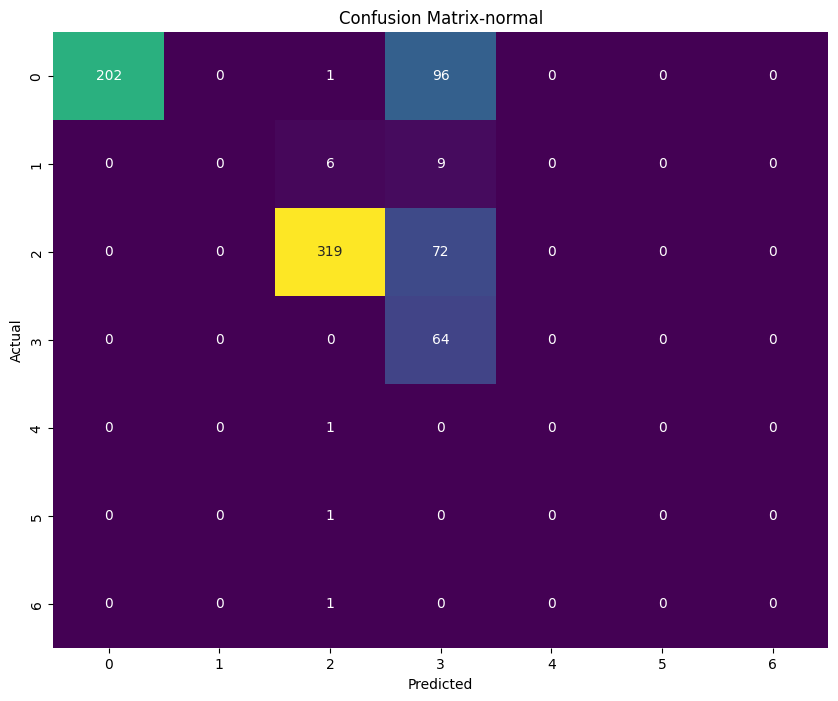

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix-normal')
plt.show()

In [26]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=True,title='Confusion matrix',cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Normalized confusion matrix


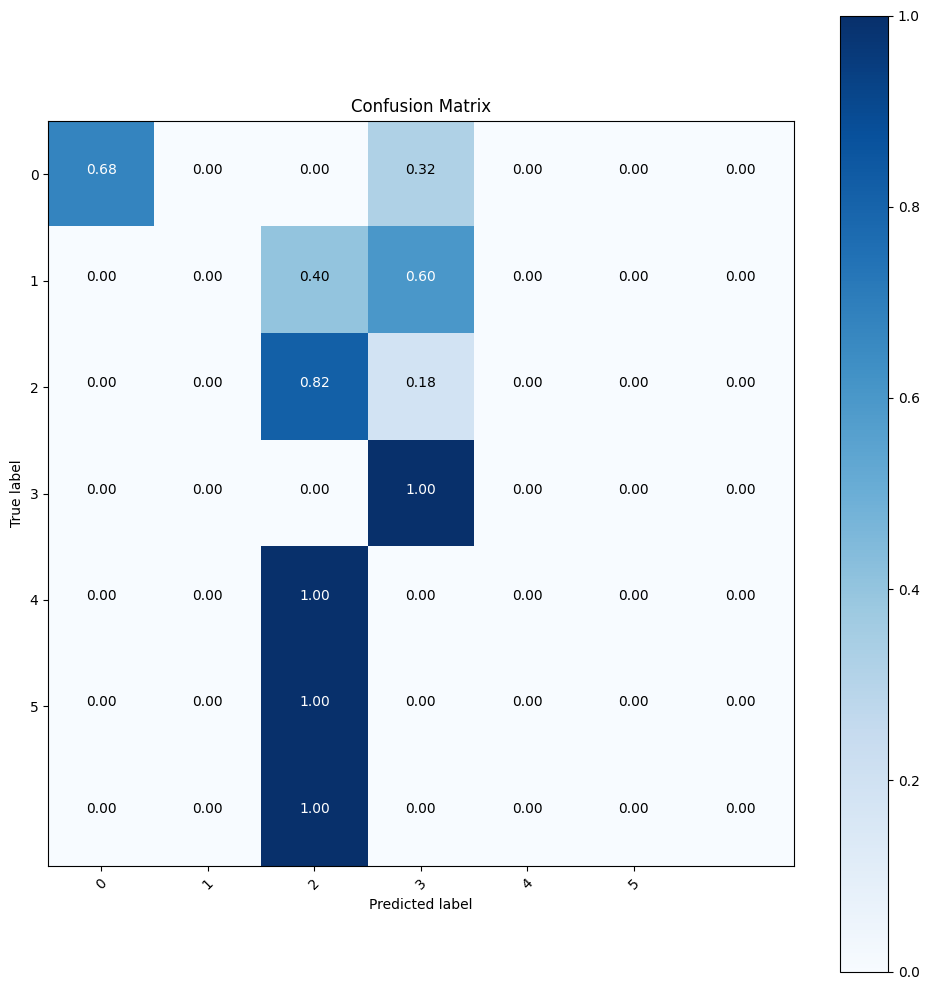

In [27]:
plot_confusion_matrix(cm, [i for i in range(6)] ,title='Confusion Matrix', normalize=True)

In [28]:
print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

           0       1.00      0.68      0.81       299
           1       0.00      0.00      0.00        15
           2       0.97      0.82      0.89       391
           3       0.27      1.00      0.42        64
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1

    accuracy                           0.76       772
   macro avg       0.32      0.36      0.30       772
weighted avg       0.90      0.76      0.80       772



C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
from keras.layers import Bidirectional
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=50))
model.add(Bidirectional(LSTM(units=50, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.build(input_shape=(None, 50))
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)              │ (None, 50, 50)              │         140,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 50, 100)             │          40,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 50, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ (None, 100)                 │          60,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 242,260 (946.33 KB)

 Trainable params: 242,260 (946.33 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
model.fit(X, y, epochs=100, batch_size=64)

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 77ms/step - accuracy: 0.2159 - loss: 2.5910
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.4111 - loss: 1.7140
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.4620 - loss: 1.7499
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.3878 - loss: 1.7808
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.3671 - loss: 1.9209
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.3941 - loss: 2.0836
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.3994 - loss: 2.0034
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.4181 - loss: 1.8402
Epoch 9/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.5027 - loss: 1.6950
Epoch 10/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.4967 - loss: 1.6299
Epoch 11/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.5247 - loss: 1.5433
Epoch 12/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step

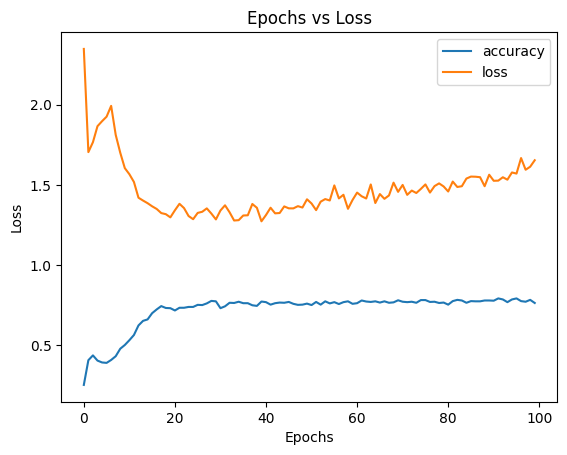

In [37]:
losses=pd.DataFrame(model.history.history)
for column in losses.columns:
    plt.plot(losses[column], label=column)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Epochs vs Loss')
plt.legend()  # Show legend with labels
plt.show()

In [38]:
y_pred = model.predict(X)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y, axis=1)

25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step


In [39]:
cm=confusion_matrix(y_test_labels, y_pred_labels)

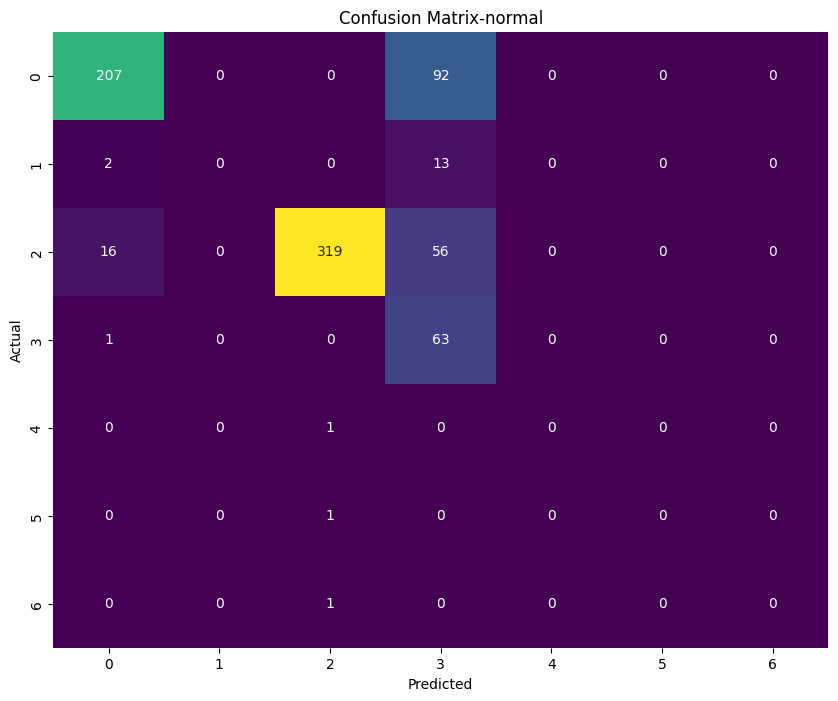

In [40]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix-normal')
plt.show()

Normalized confusion matrix


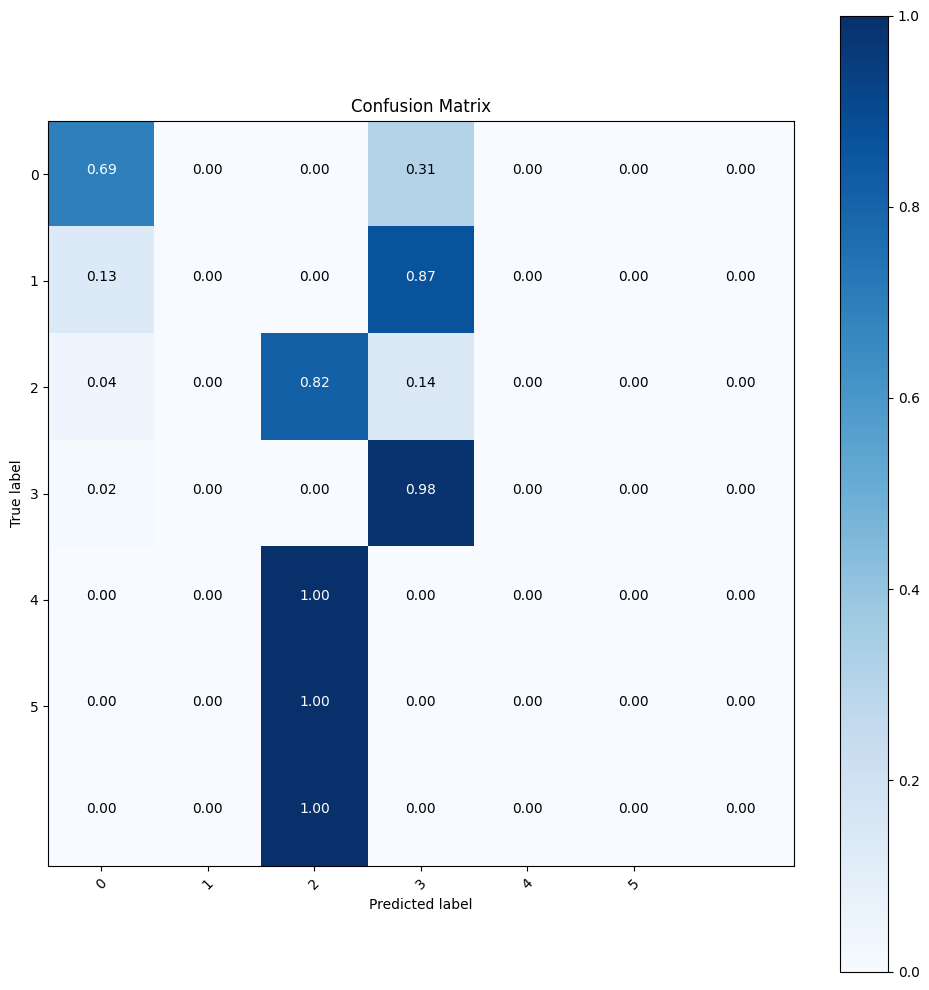

In [41]:
plot_confusion_matrix(cm, [i for i in range(6)] ,title='Confusion Matrix', normalize=True)

In [42]:
print(classification_report(y_test_labels, y_pred_labels))

              precision    recall  f1-score   support

           0       0.92      0.69      0.79       299
           1       0.00      0.00      0.00        15
           2       0.99      0.82      0.89       391
           3       0.28      0.98      0.44        64
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         1
           7       0.00      0.00      0.00         1

    accuracy                           0.76       772
   macro avg       0.31      0.36      0.30       772
weighted avg       0.88      0.76      0.79       772



C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
X = tokenizer.texts_to_sequences(empty_emoji_df['translated_text_no_emoji'])
X = pad_sequences(X, maxlen=50) 
y_pred = model.predict(X)
y_pred_labels = np.argmax(y_pred, axis=1)
y_pred_labels

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


array([0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 3, 3, 2,
       2, 2, 0, 0, 2, 0, 0, 0, 3, 2, 0, 2, 2, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       2, 0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 0,
       2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 3, 3, 2, 0,
       0, 2, 0, 2, 2, 3, 2, 0, 2, 2, 2, 0, 3, 0, 3, 0, 0, 0, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0,
       2, 2, 2, 0, 3, 0, 2, 2], dtype=int64)

In [45]:
empty_emoji_df['predicted_label']= y_pred_labels

In [46]:
empty_emoji_df

,translated_text_no_emoji,emoji_labels,predicted_label
2,Good morning friends. . . . . . Have a nice day,[],0
27,Aha!! What a peaceful sleep!!! # Sir Wooden El...,[],0
36,feeling Dil Khosh,[],0
37,"just amazing Lagtes... story is not fact, acti...",[],0
43,Willpower can break all obstacles!,[],0
...,...,...,...
909,"My mind became green, fresh and relaxed like t...",[],0
911,Happy Vijaya Dashmi with love and sincere cong...,[],3
912,Good wishes Good Night!,[],0
926,Hasina Khaleda do not live in the net! feeling...,[],2


In [47]:
emoji_df = pd.read_csv('emoji_df.csv')

In [48]:
emoji_df

,Emoji,Label
0,🙂,0
1,❤,1
2,🙁,2
3,😐,3
4,⭐,4
5,😯,5
6,💰,6
7,▶,7
8,👀,8
9,☮,9


In [52]:
merged_df = pd.merge(empty_emoji_df, emoji_df, left_on='predicted_label',right_on='Label', how='left')
merged_df.drop(['Label'],axis=1,inplace=True)
merged_df

,translated_text_no_emoji,emoji_labels,predicted_label,Emoji
0,Good morning friends. . . . . . Have a nice day,[],0,🙂
1,Aha!! What a peaceful sleep!!! # Sir Wooden El...,[],0,🙂
2,feeling Dil Khosh,[],0,🙂
3,"just amazing Lagtes... story is not fact, acti...",[],0,🙂
4,Willpower can break all obstacles!,[],0,🙂
...,...,...,...,...
157,"My mind became green, fresh and relaxed like t...",[],0,🙂
158,Happy Vijaya Dashmi with love and sincere cong...,[],3,😐
159,Good wishes Good Night!,[],0,🙂
160,Hasina Khaleda do not live in the net! feeling...,[],2,🙁


In [60]:
def func(s):
    X = tokenizer.texts_to_sequences(s)
    X = pad_sequences(X, maxlen=50) 
    y_pred = model.predict(X)
    y_pred_labels = np.argmax(y_pred, axis=1)
    print(y_pred_labels)
    emoji=emoji_df[emoji_df['Label']==y_pred_labels[0]]['Emoji']
    return emoji

In [66]:
func(["I feel sad"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
[2]


2    🙁
Name: Emoji, dtype: object

In [67]:
func(["I feel happy"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
[0]


0    🙂
Name: Emoji, dtype: object

In [69]:
func(["I am sick"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
[2]


2    🙁
Name: Emoji, dtype: object

In [70]:
func(["I feel great"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
[0]


0    🙂
Name: Emoji, dtype: object

In [72]:
func(["I want to be happy"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
[0]


0    🙂
Name: Emoji, dtype: object

In [73]:
func(["Who are you"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[0]


0    🙂
Name: Emoji, dtype: object